In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('winequality-red.csv')

In [2]:
df1 = df.drop_duplicates()

### 산점도 (파, 초, 빨)
#### 파랑색 <= Upper_Bound < 초록색 <= Threshold < 빨간색
fixed acidity

volatile acidity

residual sugar

total sulfur dioxide

sulphates

(이상치와 이상치가 아닌데 그 중에서 우리가 시각화로 선별해서 살리기로 한 값과 그냥 이상치가 아닌 값의 산점도임)

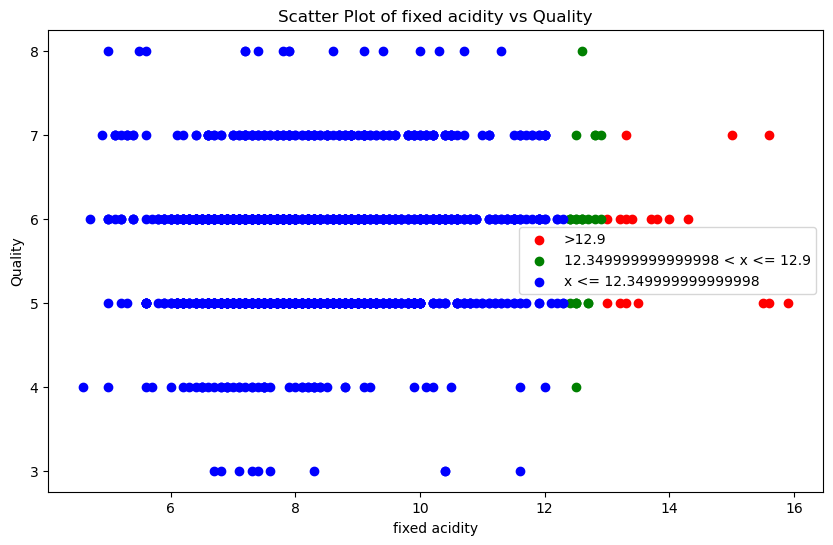

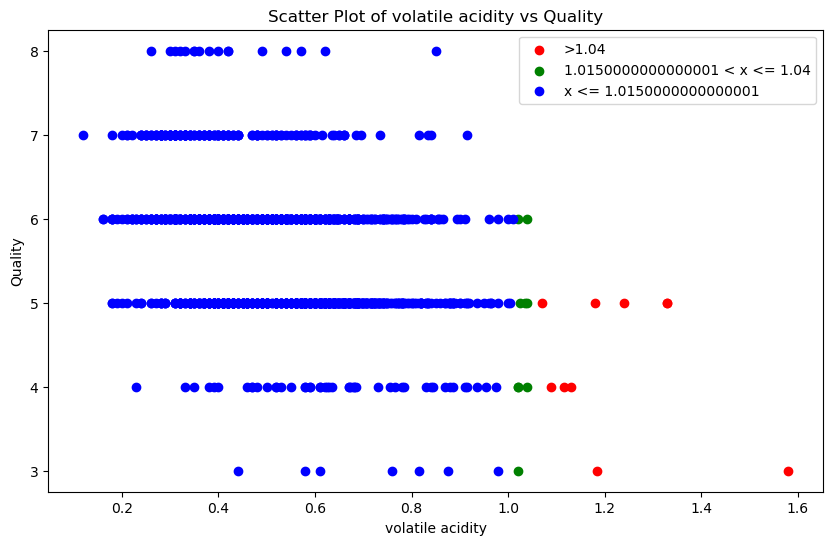

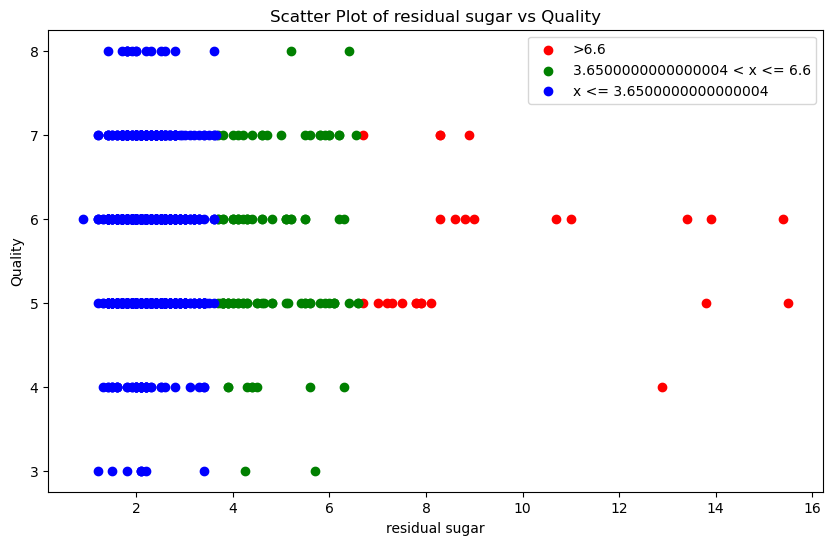

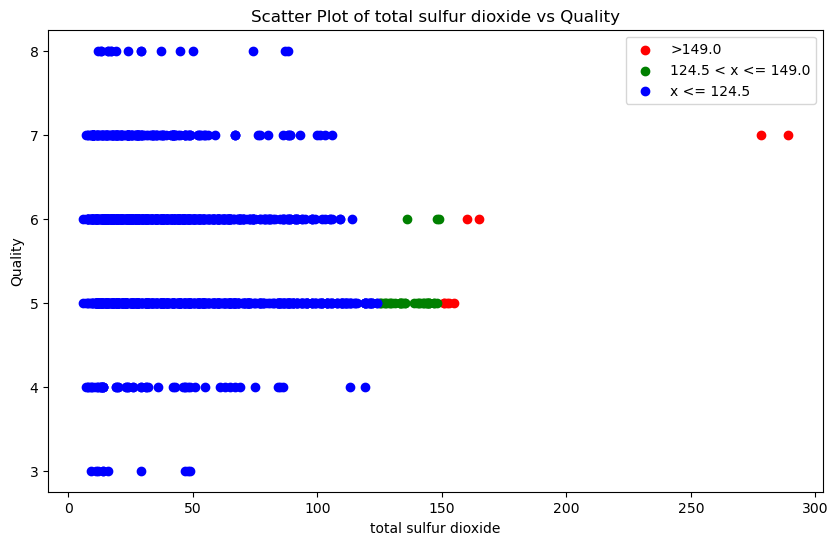

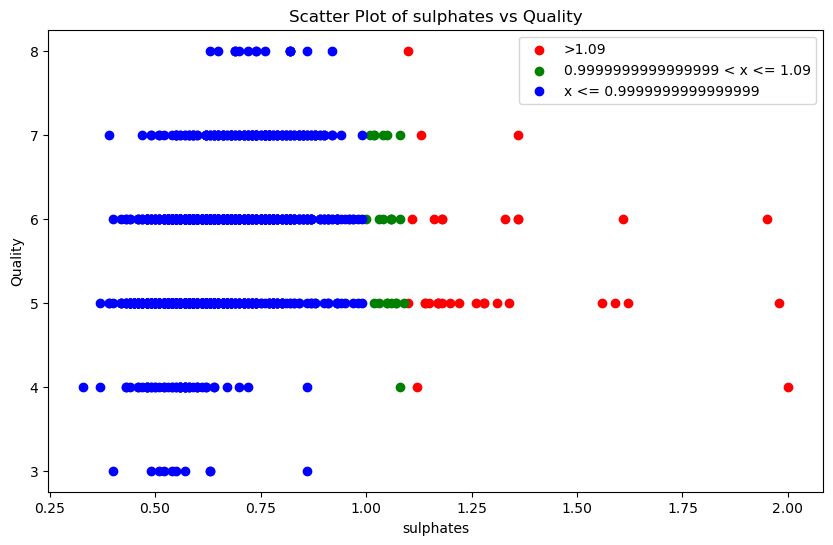

In [9]:
import matplotlib.pyplot as plt

# 산점도를 그릴 열 선택
selected_columns = ['fixed acidity', 'volatile acidity', 'residual sugar', 'total sulfur dioxide', 'sulphates']

# 각 열에 대한 임계값 및 상한값 딕셔너리 정의
criteria = {
    'fixed acidity': 12.9,
    'volatile acidity': 1.04,
    'residual sugar': 6.6,
    'total sulfur dioxide': 149.0,
    'sulphates': 1.09
}

upper_bound_values = {
    'fixed acidity': df1['fixed acidity'].quantile(0.75) + 1.5 * (df1['fixed acidity'].quantile(0.75) - df1['fixed acidity'].quantile(0.25)),
    'volatile acidity': df1['volatile acidity'].quantile(0.75) + 1.5 * (df1['volatile acidity'].quantile(0.75) - df1['volatile acidity'].quantile(0.25)),
    'residual sugar': df1['residual sugar'].quantile(0.75) + 1.5 * (df1['residual sugar'].quantile(0.75) - df1['residual sugar'].quantile(0.25)),
    'total sulfur dioxide': df1['total sulfur dioxide'].quantile(0.75) + 1.5 * (df1['total sulfur dioxide'].quantile(0.75) - df1['total sulfur dioxide'].quantile(0.25)),
    'sulphates': df1['sulphates'].quantile(0.75) + 1.5 * (df1['sulphates'].quantile(0.75) - df1['sulphates'].quantile(0.25))
}

# 각 열에 대해 반복
for column_name in selected_columns:
    # 플롯 생성
    plt.figure(figsize=(10, 6))

    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 임계값 및 상한값 지정
    threshold = criteria[column_name]
    upper_bound_value = upper_bound_values[column_name]

    # 특정 조건에 맞는 데이터 선택
    red_points = df1[df1[column_name] > threshold]
    green_points = df1[(df1[column_name] > upper_bound) & (df1[column_name] <= threshold)]
    blue_points = df1[df1[column_name] <= upper_bound]

    # 빨간색 점 플롯
    plt.scatter(red_points[column_name], red_points['quality'], color='red', label=f'>{threshold}')

    # 초록색 점 플롯
    plt.scatter(green_points[column_name], green_points['quality'], color='green', label=f'{upper_bound} < x <= {threshold}')

    # 파란색 점 플롯
    plt.scatter(blue_points[column_name], blue_points['quality'], color='blue', label=f'x <= {upper_bound}')

    # 축 및 레이블 설정
    plt.xlabel(column_name)
    plt.ylabel('Quality')
    plt.title(f'Scatter Plot of {column_name} vs Quality')
    plt.legend()

    # 플롯 표시
    plt.show()


### 산점도 (파, 빨)
이상치와 이상치가 아닌 값들의 산점도는

citric acid

free sulfur dioxide

alcohol

만을 그려보았다.

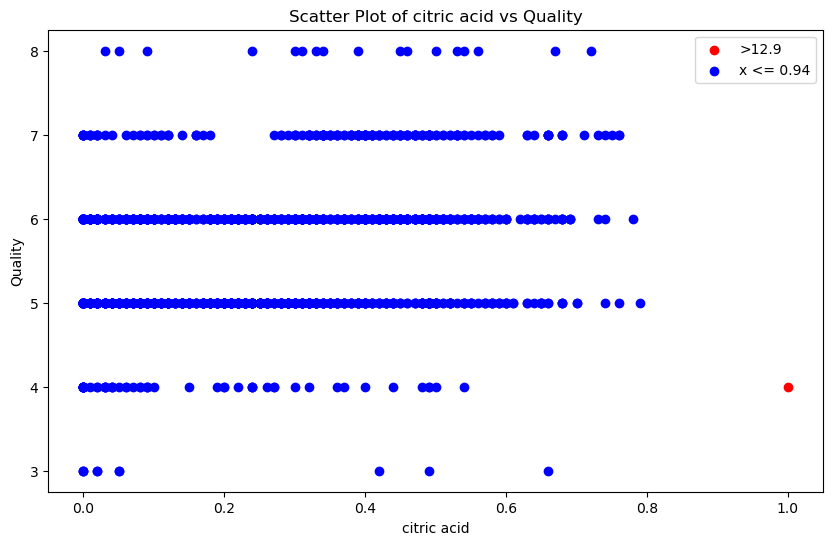

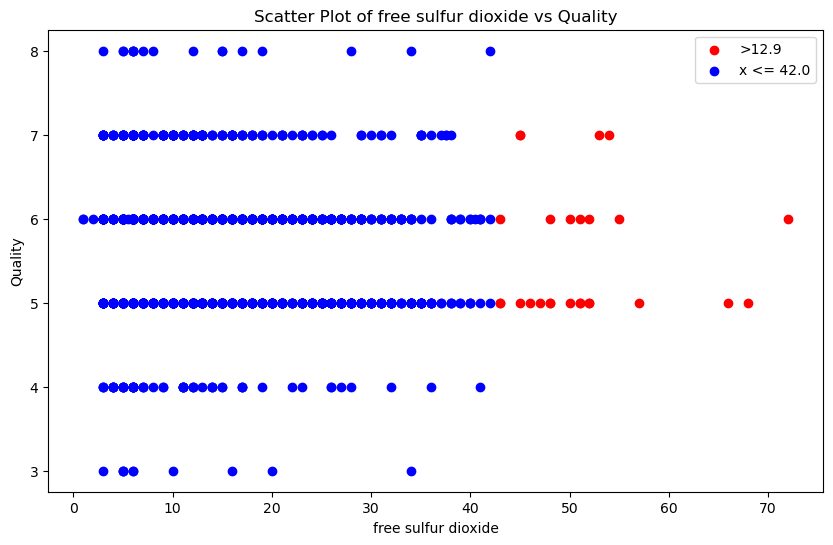

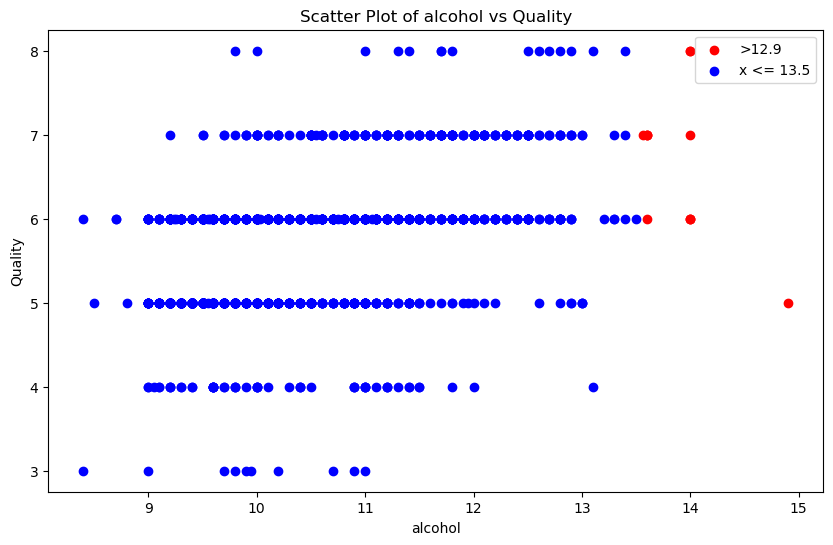

In [12]:
import matplotlib.pyplot as plt

# 선택할 열들
selected_columns = ['citric acid', 'free sulfur dioxide', 'alcohol']

# 반복문으로 각 열에 대한 산점도 그리기
for column_name in selected_columns:
    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 플롯 생성
    plt.figure(figsize=(10, 6))

    # 특정 조건에 맞는 데이터 선택
    red_points = df1[df1[column_name] > upper_bound]
    blue_points = df1[df1[column_name] <= upper_bound]

    # 빨간색 점 플롯
    plt.scatter(red_points[column_name], red_points['quality'], color='red', label=f'>{12.9}')

    # 파란색 점 플롯
    plt.scatter(blue_points[column_name], blue_points['quality'], color='blue', label=f'x <= {upper_bound}')

    # 축 및 레이블 설정
    plt.xlabel(column_name)
    plt.ylabel('Quality')
    plt.title(f'Scatter Plot of {column_name} vs Quality')
    plt.legend()

    # 플롯 표시
    plt.show()

### pH, density 산점도

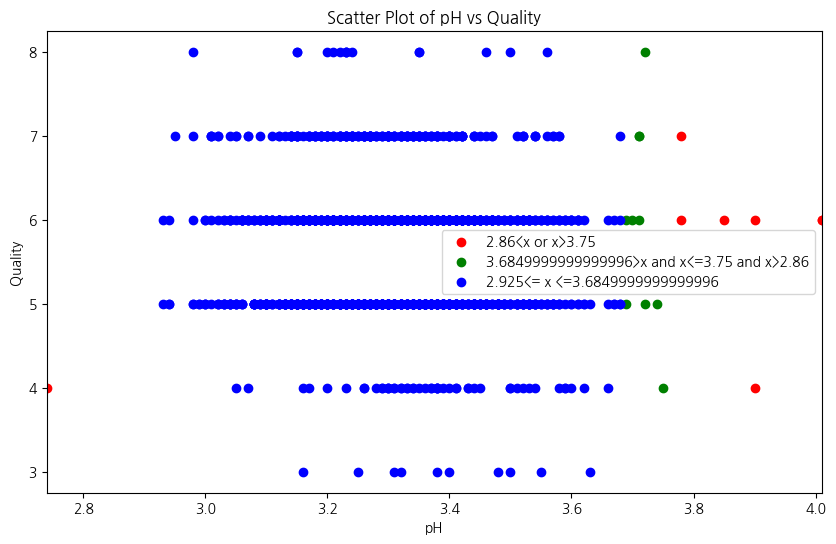

In [27]:
import matplotlib.pyplot as plt

# 선택한 열
column_name = 'pH'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 플롯 생성
plt.figure(figsize=(10, 6))

# 특정 조건에 맞는 데이터 선택
red_points = df1[(df1[column_name] < 2.86) | (df1[column_name] > 3.75)]
green_points = df1[(df1[column_name] > upper_bound) & (df1[column_name] <= 3.75) & (df1[column_name] > 2.86)]
blue_points = df1[(df1[column_name] <= upper_bound) & (df1[column_name] >= lower_bound)]

# 빨간색 점 플롯
plt.scatter(red_points[column_name], red_points['quality'], color='red', label='2.86<x or x>3.75')

# 초록색 점 플롯
plt.scatter(green_points[column_name], green_points['quality'], color='green', label=f'{upper_bound}>x and x<=3.75 and x>2.86')

# 파란색 점 플롯
plt.scatter(blue_points[column_name], blue_points['quality'], color='blue', label=f'{lower_bound}<= x <={upper_bound}')

# x 축 범위 설정
plt.xlim(df1[column_name].min(), df1[column_name].max())

# 축 및 레이블 설정
plt.xlabel(column_name)
plt.ylabel('Quality')
plt.title(f'Scatter Plot of {column_name} vs Quality')
plt.legend()

# 플롯 표시
plt.show()

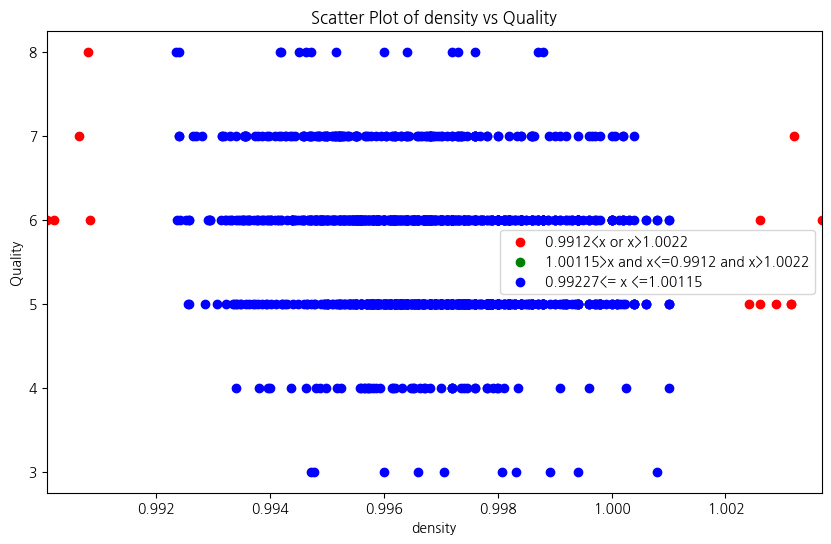

In [29]:
import matplotlib.pyplot as plt

# 선택한 열
column_name = 'density'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 플롯 생성
plt.figure(figsize=(10, 6))

# 특정 조건에 맞는 데이터 선택
red_points = df1[(df1[column_name] < 0.9912) | (df1[column_name] > 1.0022)]
green_points = df1[(df1[column_name] > 0.9912) & (df1[column_name] <= upper_bound) & (df1[column_name] > 1.0022)]
blue_points = df1[(df1[column_name] <= upper_bound) & (df1[column_name] >= lower_bound)]

# 빨간색 점 플롯
plt.scatter(red_points[column_name], red_points['quality'], color='red', label='0.9912<x or x>1.0022')

# 초록색 점 플롯
plt.scatter(green_points[column_name], green_points['quality'], color='green', label=f'{upper_bound}>x and x<=0.9912 and x>1.0022')

# 파란색 점 플롯
plt.scatter(blue_points[column_name], blue_points['quality'], color='blue', label=f'{lower_bound}<= x <={upper_bound}')

# x 축 범위 설정
plt.xlim(df1[column_name].min(), df1[column_name].max())

# 축 및 레이블 설정
plt.xlabel(column_name)
plt.ylabel('Quality')
plt.title(f'Scatter Plot of {column_name} vs Quality')
plt.legend()

# 플롯 표시
plt.show()

### 초록색 포인트가 표시되지 않은 걸 한번 확인해볼 필요가 있다.